<a href="https://colab.research.google.com/github/prakriti-yeole/portfolio/blob/main/tsmdf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving akbaghelLL (1).txt to akbaghelLL (1).txt


In [ ]:
!pip install matplotlib

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
# Read data from the uploaded file
file_name = "akbaghelLL (1).txt"  # Replace with your file name
with open(file_name, "r") as file:
    lines = file.readlines()


In [ ]:
x_values = []
y_values = []

for line in lines:
    x, y = map(float, line.split())
    x_values.append(x)
    y_values.append(y)

# Create a matrix from the x and y values
data_matrix = np.array([x_values, y_values])

# Transpose the matrix to have x and y as rows and data points as columns
data_matrix = data_matrix.T

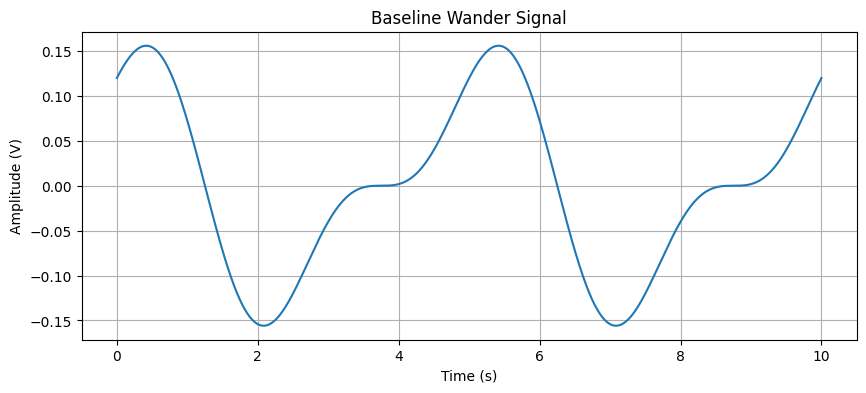

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the sampling rate and time vector
sampling_rate = 1000  # Hz
t = np.arange(0, 10, 1 / sampling_rate)  # 10 seconds of data

# Define the frequencies and amplitudes for the sine and cosine components
sine_freq = 0.4  # Hz
sine_amplitude = 60e-3  # 60 mV converted to V

cosine_freq = 0.2  # Hz
cosine_amplitude = 120e-3  # 120 mV converted to V

# Generate the sine and cosine components of the baseline wander
sine_wave = sine_amplitude * np.sin(2 * np.pi * sine_freq * t)
cosine_wave = cosine_amplitude * np.cos(2 * np.pi * cosine_freq * t)

# Combine the sine and cosine components to create the baseline wander signal
baseline_wander_signal = sine_wave + cosine_wave

# Plot the baseline wander signal
plt.figure(figsize=(10, 4))
plt.plot(t, baseline_wander_signal)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (V)')
plt.title('Baseline Wander Signal')
plt.grid(True)
plt.show()


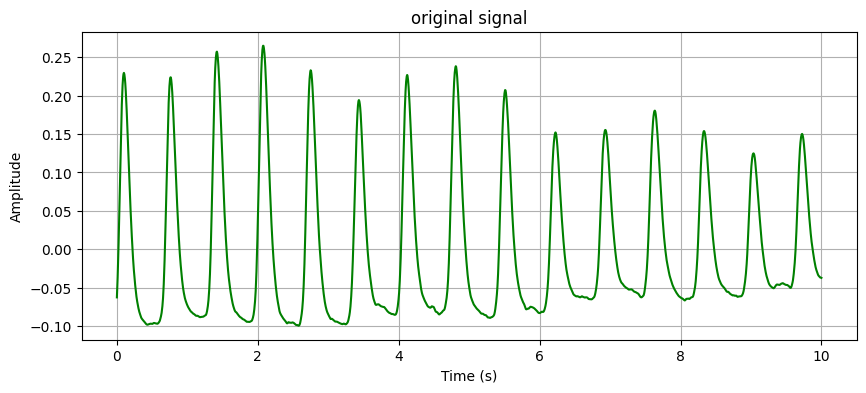

In [ ]:
original_signal = np.interp(t, x_values, y_values)

plt.figure(figsize=(10, 4))

plt.plot(t, original_signal, color='green')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('original signal')
plt.grid(True)
plt.show()

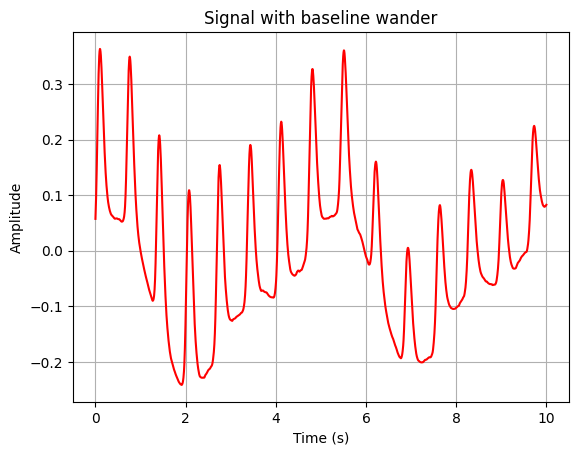

In [ ]:
baseline_wander_signal = baseline_wander_signal[:len(original_signal)]
signal_with_baseline_wander = original_signal + baseline_wander_signal
plt.plot(t, signal_with_baseline_wander, color='red')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Signal with baseline wander')
plt.grid(True)


plt.show()

In [ ]:
# old code single time mean/med

import math

def TSMdF_algorithm(X, fs, approach="TSMdF"):
    r, c = X.shape
    N = c
    L1 = int(0.3 * fs)  # Window size for the first stage
    L2 = int(0.6 * fs)  # Window size for the second stage
    K1 = np.mean(np.sum(X, axis=0) / N) #mean removal-1

    Q = X - K1          #corrupted ppg after mean removal

    Y = np.zeros_like(X)

    for j in range(c):
        n1_start = max(j - math.floor(L1/2), 0) #index for 1st window start
        n1_end = min(j + math.floor(L1/2), c - 1) #index for 1st window end
        n2_start = max(j - math.floor(L2/2), 0) #index for 2nd window start
        n2_end = min(j + math.floor(L2/2), c - 1) #index for 2nd window end


        y_n1 = np.median(Q[:, n1_start:n1_end + 1], axis=1) #taking median for 1st window
        y_n2 = np.median(Q[:, n2_start:n2_end + 1], axis=1) #taking median for 2nd window

        if approach == "TSMdF":
            X[:, j] = y_n2     #calculating filtered signal


        K2 = np.mean(X[:, j]) #mean removal- 2

        Y[:, j] = X[:, j] - K2  #filtered signal after mean removal

    return Y


filtered_signal = TSMdF_algorithm(signal_with_baseline_wander.reshape(1, -1), 200  , approach="TSMdF")




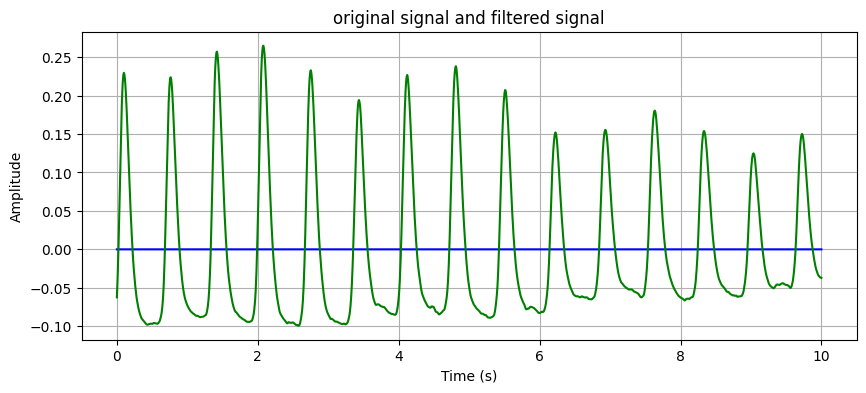

In [ ]:
# filtered_signal = reverse_median_filter(original_signal,window_size)
plt.figure(figsize=(10, 4))


plt.plot(t, filtered_signal.ravel(), color='blue', label='filtered signal')
plt.plot(t, original_signal, color='green',label='original signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('original signal and filtered signal')
plt.grid(True)

plt.show()